## Caso - Producciones S.A.
---

La empresa **PRODUCCIONES SA** fabrica un solo producto, registrando la siguiente información:


#### Costos Incurrridos

| Concepto                               | Fijos ($)   | Variables ($) | Total ($)   |
|----------------------------------------|-------------|---------------|-------------|
| **Material Directo Utilizado**         | –           | 100.000,00    | 100.000,00  |
| **Mano de Obra Directa (MOD)**         | –           | 70.000,00     | 70.000,00   |
| **Energía Eléctrica**                  | –           | 5.000,00      | 5.000,00    |
| **Mano de Obra Indirecta (MOI)**       | 20.000,00   | 10.000,00     | 30.000,00   |
| **Otros CIF**                          | 20.000,00   | 8.000,00      | 28.000,00   |
| **Gastos de Administración**           | 25.000,00   | –             | 25.000,00   |
| **Gastos de Venta**                    | 30.000,00   | –             | 30.000,00   |
| **Totales**                            | 95.000,00   | 193.000,00    | 288.000,00  |



#### Inventarios Finales al 31-12
- Producción en Proceso: **No hay**  
- Materiales Directos: **2.000 kg**  
- Productos Terminados: **$20.970,00** (valuado a costo promedio del semestre)  



#### Producción y Ventas
- Producción del Período: **100.000 unidades**  
- Ventas del Semestre: **$318.500,00**  
- Inventarios Iniciales: **No existen**  
- Material Directo por unidad: **2 kg/unidad**  
- Precio de Materiales: **Constante durante el período**  

---

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch

In [66]:
# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")

In [67]:
# Datos 
datos = {
    # Costos de Producción
    'material_directo_utilizado': 100000,
    'mano_obra_directa': 70000,
    'energia_electrica': 5000,
    'mano_obra_indirecta_fija': 20000,
    'mano_obra_indirecta_variable': 10000,
    'otros_cif_fijos': 20000,
    'otros_cif_variables': 8000,
    
    # Gastos
    'gastos_administracion': 25000,
    'gastos_venta': 30000,
    
    # Inventarios
    'inventario_final_material_kg': 2000,
    'inventario_final_pt_pesos': 20970,
    
    # Producción
    'unidades_producidas': 100000,
    'ventas_pesos': 318500,
    'requerimiento_material_por_unidad': 2
}


#### 1️⃣ Inventario Final de Material Directo

El inventario final de material directo se calcula a partir del **costo por kg** de material y los kilos restantes en stock:

\begin{align*}
\text{Costo por kg} = \frac{\text{Material Directo Utilizado}}{\text{Consumo Total de Material (kg)}}\\
\\
\text{Inventario Final MP} = \text{Inventario Final (kg)} \times \text{Costo por kg}\\
\end{align*}


*Datos:*
- Material Directo Utilizado: \$100.000  
- Producción: 100.000 unidades  
- Requerimiento: 2 kg/unidad  
- Inventario Final: 2.000 kg  


In [68]:
# Función para cálculo de Inventario Final Material Directo
def calcular_inventario_material_directo():
    """Calcula el inventario final de material directo en pesos"""
    material_utilizado = datos['material_directo_utilizado']
    unidades_producidas = datos['unidades_producidas']
    requerimiento_por_unidad = datos['requerimiento_material_por_unidad']
    
    # Calcular consumo total de material
    consumo_total_kg = unidades_producidas * requerimiento_por_unidad
    
    # Calcular costo por kg
    costo_por_kg = material_utilizado / consumo_total_kg
    
    # Calcular inventario final en pesos
    inventario_final_kg = datos['inventario_final_material_kg']
    inventario_final_pesos = inventario_final_kg * costo_por_kg
    
    df_material = pd.DataFrame({
        'Concepto': ['Material Directo Utilizado', 'Unidades Producidas', 
                     'Requerimiento por Unidad', 'Consumo Total Material (kg)',
                     'Costo por kg', 'Inventario Final (kg)', 'INVENTARIO FINAL MATERIAL DIRECTO ($)'],
                'Cálculo': ['Dato', 'Dato', 'Dato', 
                   f'{unidades_producidas} × {requerimiento_por_unidad}',
                   f'{material_utilizado} / {consumo_total_kg}',
                   'Dato', f'{inventario_final_kg} × {costo_por_kg:.4f}'],
        'Valor': [f"${material_utilizado:,.2f}", f"{unidades_producidas:,.0f} unid",
                 f"{requerimiento_por_unidad} kg", f"{consumo_total_kg:,.0f} kg",
                 f"${costo_por_kg:,.4f}", f"{inventario_final_kg:,.0f} kg",
                 f"${inventario_final_pesos:,.2f}"]
    })
    
    return inventario_final_pesos, df_material

In [69]:
# Ejecutar las funciones y mostrar resultados
inventario_material, df_material = calcular_inventario_material_directo()
print("\n1. INVENTARIO FINAL MATERIAL DIRECTO:")
display(df_material.style.hide(axis="index"))


1. INVENTARIO FINAL MATERIAL DIRECTO:


Concepto,Cálculo,Valor
Material Directo Utilizado,Dato,"$100,000.00"
Unidades Producidas,Dato,"100,000 unid"
Requerimiento por Unidad,Dato,2 kg
Consumo Total Material (kg),100000 × 2,"200,000 kg"
Costo por kg,100000 / 200000,$0.5000
Inventario Final (kg),Dato,"2,000 kg"
INVENTARIO FINAL MATERIAL DIRECTO ($),2000 × 0.5000,"$1,000.00"


El cálculo muestra el valor en pesos del inventario de materiales al cierre.

#### 2️⃣ Existencia Final de Productos Terminados
 
Primero se determina el **costo unitario de producción** considerando **costos fijos + variables**.  
Luego se divide el valor del inventario final de productos terminados entre este costo unitario:

\begin{align*}
\text{Costo Unitario Producción} = \frac{\text{Costos Fijos + Costos Variables}}{\text{Unidades Producidas}}\\
\\
\text{Inventario Final PT (unid)} = \frac{\text{Inventario Final PT (\$)}}{\text{Costo Unitario}}
\end{align*}


*Datos:*
- Costos Fijos Producción = \$40.000  
- Costos Variables Producción = \$193.000  
- Producción Total: 100.000 unid  
- Inventario Final PT (valuado): \$20.970  

El cálculo va a dar la **cantidad de unidades en stock** al final del período.

In [70]:
# Función para cálculo de Existencia Final Productos Terminados
def calcular_inventario_pt_unidades():
    """Calcula el inventario final de productos terminados en unidades"""
    # Costos fijos de producción
    costos_fijos = (datos['mano_obra_indirecta_fija'] + 
                   datos['otros_cif_fijos'])
    
    # Costos variables de producción
    costos_variables = (datos['material_directo_utilizado'] +
                       datos['mano_obra_directa'] +
                       datos['energia_electrica'] +
                       datos['mano_obra_indirecta_variable'] +
                       datos['otros_cif_variables'])

    costo_total_produccion = costos_fijos + costos_variables
    unidades_producidas = datos['unidades_producidas']

    # Calcular costo unitario
    costo_unitario = costo_total_produccion / unidades_producidas
    
    # Calcular unidades en inventario final
    inventario_final_pesos = datos['inventario_final_pt_pesos']
    inventario_final_unidades = inventario_final_pesos / costo_unitario
    
    df_pt = pd.DataFrame({
        'Concepto': ['Costos Fijos Producción', 'Costos Variables Producción',
                     'Costo Total Producción', 'Unidades Producidas',
                     'Costo Unitario', 'Inventario Final PT ($)',
                     'INVENTARIO FINAL PT (unidades)'],
        'Cálculo': ['MO Indirecta Fija + Otros CIF Fijos', 
                   'Material + MOD + Energía + MOI Var + CIF Var',
                   f'{costos_fijos} + {costos_variables}',
                   'Dato', f'{costo_total_produccion} / {unidades_producidas}',
                   'Dato', f'{inventario_final_pesos} / {costo_unitario:.4f}'],
        'Valor': [f"${costos_fijos:,.2f}", f"${costos_variables:,.2f}",
                 f"${costo_total_produccion:,.2f}", f"{unidades_producidas:,.0f} unid",
                 f"${costo_unitario:,.4f}", f"${inventario_final_pesos:,.2f}",
                 f"{inventario_final_unidades:,.0f} unid"],
    })
    
    return inventario_final_unidades, df_pt

In [71]:
inventario_pt, df_pt = calcular_inventario_pt_unidades()
print("\n2. EXISTENCIA FINAL PRODUCTOS TERMINADOS:")
display(df_pt.style.hide(axis="index"))


2. EXISTENCIA FINAL PRODUCTOS TERMINADOS:


Concepto,Cálculo,Valor
Costos Fijos Producción,MO Indirecta Fija + Otros CIF Fijos,"$40,000.00"
Costos Variables Producción,Material + MOD + Energía + MOI Var + CIF Var,"$193,000.00"
Costo Total Producción,40000 + 193000,"$233,000.00"
Unidades Producidas,Dato,"100,000 unid"
Costo Unitario,233000 / 100000,$2.3300
Inventario Final PT ($),Dato,"$20,970.00"
INVENTARIO FINAL PT (unidades),20970 / 2.3300,"9,000 unid"


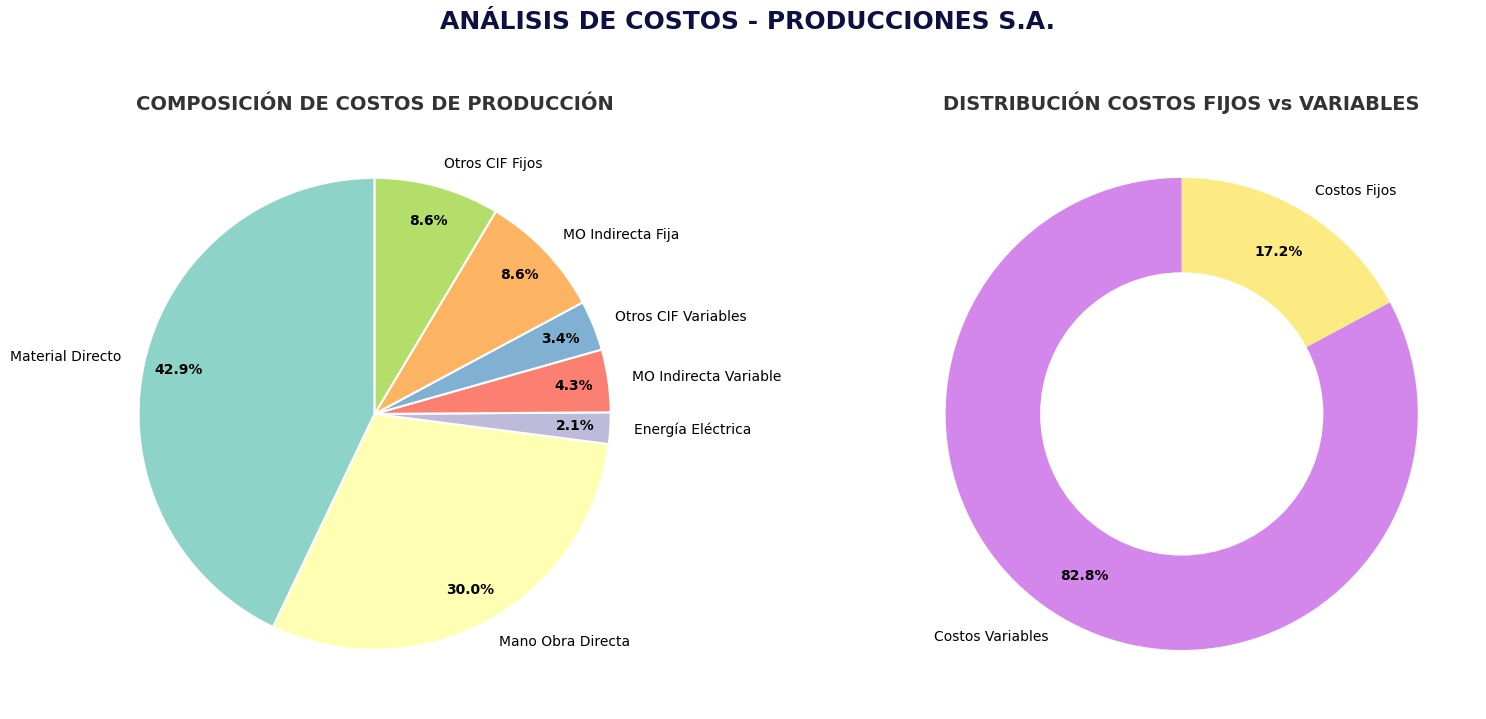

In [72]:
# GRÁFICOS DE COMPOSICIÓN DE COSTOS DE PRODUCCIÓN
# Datos para los gráficos
costos_produccion = {
    'Material Directo': 100000,
    'Mano Obra Directa': 70000,
    'Energía Eléctrica': 5000,
    'MO Indirecta Variable': 10000,
    'Otros CIF Variables': 8000,
    'MO Indirecta Fija': 20000,
    'Otros CIF Fijos': 20000
}

costos_tipo = {
    'Costos Variables': 100000 + 70000 + 5000 + 10000 + 8000,
    'Costos Fijos': 20000 + 20000
}

# Configuración de la figura y subplots (2 columnas, 1 fila)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# GRÁFICO 1: Composición de Costos de Producción (Torta)
labels_produccion = list(costos_produccion.keys())
values_produccion = list(costos_produccion.values())
# Usar un colormap más vibrante y asegurar un buen contraste
colors_produccion = plt.cm.Set3.colors # O 'Paired', 'Set1', 'viridis' para un estilo diferente

wedges, texts, autotexts = ax1.pie(
    values_produccion,
    labels=labels_produccion,
    autopct='%1.1f%%',
    colors=colors_produccion,
    startangle=90,
    pctdistance=0.85, # Distancia de los porcentajes desde el centro
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5} # Borde blanco para las secciones
)
ax1.set_title('COMPOSICIÓN DE COSTOS DE PRODUCCIÓN', fontweight='bold', fontsize=14, color='#333333') # Título

# Mejorar legibilidad de los porcentajes
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10) # Ajustar tamaño de fuente

# Ajustar legibilidad de las etiquetas
for text in texts:
    text.set_fontsize(10)


# --- GRÁFICO 2: Distribución de Costos Fijos vs Variables, Donut Chart
labels_tipo = list(costos_tipo.keys())
values_tipo = list(costos_tipo.values())
colors_tipo = ["#D487EB", "#FCEA83"]

# Crear el gráfico de torta
wedges2, texts2, autotexts2 = ax2.pie(
    values_tipo,
    labels=labels_tipo,
    autopct='%1.1f%%',
    colors=colors_tipo,
    startangle=90,
    pctdistance=0.8 # Distancia de los porcentajes
)

# Dibujar un círculo blanco para "anillo"
centre_circle = plt.Circle((0,0), 0.60, fc='white') # radio 0.6
fig.gca().add_artist(centre_circle)

ax2.set_title('DISTRIBUCIÓN COSTOS FIJOS vs VARIABLES', fontweight='bold', fontsize=14, color='#333333') # Título

# Mejorar legibilidad de los porcentajes
for autotext in autotexts2:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Ajustar legibilidad de las etiquetas
for text in texts2:
    text.set_fontsize(10)

# Ajustes generales de la figura
plt.suptitle('ANÁLISIS DE COSTOS - PRODUCCIONES S.A.', fontsize=18, fontweight='bold', color="#0C1141", y=1.02) # Título general
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el layout para dar espacio al suptitle
plt.show()

#### 3️⃣ Resultado Neto del Período

El resultado operativo se calcula como:

\begin{align*}
\text{Resultado Neto} = \text{Ventas} - \text{CMV} - \text{Gastos Adm} - \text{Gastos Venta}\\
\\
\end{align*}
donde: 

\begin{align*}
\text{CMV} = \text{Unidades Vendidas} \times \text{Costo Unitario}\\
\end{align*}


*Datos:*
- Ventas: \$318.500  
- Unidades Vendidas = Producción - Inventario Final  
- Costo Unitario calculado anteriormente  
- Gastos Adm = \$25.000  
- Gastos Venta = \$30.000  

El cálculo entrega la utilidad neta del semestre.

In [73]:
# Función para cálculo de Resultado Neto
def calcular_resultado_neto():
    """Calcula el resultado neto del período"""
    # Primero calcular costo unitario (reutilizando función anterior)
    costos_fijos = (datos['mano_obra_indirecta_fija'] + 
                   datos['otros_cif_fijos'])
    costos_variables = (datos['material_directo_utilizado'] +
                       datos['mano_obra_directa'] +
                       datos['energia_electrica'] +
                       datos['mano_obra_indirecta_variable'] +
                       datos['otros_cif_variables'])
    costo_total_produccion = costos_fijos + costos_variables
    unidades_producidas = datos['unidades_producidas']
    costo_unitario = costo_total_produccion / unidades_producidas
    
    # Calcular unidades vendidas (asumiendo inventario final de 9000 unidades)
    inventario_final_unidades = 9000  # Del cálculo anterior
    unidades_vendidas = unidades_producidas - inventario_final_unidades
    
    # Calcular costo de mercadería vendida
    cmv = unidades_vendidas * costo_unitario
    
    # Calcular resultado
    ventas = datos['ventas_pesos']
    resultado_bruto = ventas - cmv
    gastos_administracion = datos['gastos_administracion']
    gastos_venta = datos['gastos_venta']
    resultado_neto = resultado_bruto - gastos_administracion - gastos_venta
    
    df_resultado = pd.DataFrame({
        'Concepto': ['Ventas', 'Unidades Vendidas', 'Costo Unitario',
                     'Costo Mercadería Vendida', 'Resultado Bruto',
                     'Gastos Administración', 'Gastos Venta', 'RESULTADO NETO'],
        'Cálculo': ['Dato', f'{unidades_producidas} - {inventario_final_unidades}',
                   'Calculado anteriormente', f'{unidades_vendidas} × {costo_unitario:.4f}',
                   f'{ventas} - {cmv}', 'Dato', 'Dato',
                   f'{resultado_bruto} - {gastos_administracion} - {gastos_venta}'],
        'Valor': [f"${ventas:,.2f}", f"{unidades_vendidas:,.0f} unid",
                 f"${costo_unitario:,.4f}", f"${cmv:,.2f}",
                 f"${resultado_bruto:,.2f}", f"${gastos_administracion:,.2f}",
                 f"${gastos_venta:,.2f}", f"${resultado_neto:,.2f}"],
    })
    
    return resultado_neto, df_resultado


In [74]:
resultado_neto, df_resultado = calcular_resultado_neto()
print("\n3. RESULTADO NETO DEL PERÍODO:")
display(df_resultado.style.hide(axis="index"))


3. RESULTADO NETO DEL PERÍODO:


Concepto,Cálculo,Valor
Ventas,Dato,"$318,500.00"
Unidades Vendidas,100000 - 9000,"91,000 unid"
Costo Unitario,Calculado anteriormente,$2.3300
Costo Mercadería Vendida,91000 × 2.3300,"$212,030.00"
Resultado Bruto,318500 - 212030.0,"$106,470.00"
Gastos Administración,Dato,"$25,000.00"
Gastos Venta,Dato,"$30,000.00"
RESULTADO NETO,106470.0 - 25000 - 30000,"$51,470.00"


In [75]:
# Resumen de resultados
print("\nRESUMEN DE RESULTADOS:")
print("="*40)
print(f"1. Inventario Final Material Directo: ${inventario_material:,.2f}")
print(f"2. Existencia Final PT (unidades): {inventario_pt:,.0f} unidades")
print(f"3. Resultado Neto: ${resultado_neto:,.2f}")



RESUMEN DE RESULTADOS:
1. Inventario Final Material Directo: $1,000.00
2. Existencia Final PT (unidades): 9,000 unidades
3. Resultado Neto: $51,470.00


In [ ]:
# CÁLCULOS ADICIONALES

# Precio de venta unitario
unidades_vendidas = datos['unidades_producidas'] - inventario_pt
precio_venta_unitario = datos['ventas_pesos'] / unidades_vendidas

# Costos fijos totales
costos_fijos_totales = (datos['mano_obra_indirecta_fija'] + 
                        datos['otros_cif_fijos'] + 
                        datos['gastos_administracion'] + 
                        datos['gastos_venta'])

# Costos variables totales
costos_variables_totales = (datos['material_directo_utilizado'] +
                            datos['mano_obra_directa'] +
                            datos['energia_electrica'] +
                            datos['mano_obra_indirecta_variable'] +
                            datos['otros_cif_variables'])

# Margen de contribución unitario
costo_variable_unitario = costos_variables_totales / datos['unidades_producidas']
margen_contribucion_unitario = precio_venta_unitario - costo_variable_unitario

# Punto de equilibrio en unidades
punto_equilibrio_unidades = costos_fijos_totales / margen_contribucion_unitario

# Punto de equilibrio en pesos
punto_equilibrio_pesos = punto_equilibrio_unidades * precio_venta_unitario

# Resumen en DataFrame
resumen = pd.DataFrame({
    'Concepto': [
        'Costos Fijos Totales',
        'Costos Variables Totales',
        'Precio de Venta Unitario',
        'Unidades Vendidas',
        'Margen de Contribución Unitario',
        'Punto de Equilibrio (Unidades)',
        'Punto de Equilibrio ($)'
    ],
    'Valor': [
        f'${costos_fijos_totales:,.2f}',
        f'${costos_variables_totales:,.2f}',
        f'${precio_venta_unitario:,.4f}',
        f'{unidades_vendidas:,.0f} unid',
        f'${margen_contribucion_unitario:,.4f}',
        f'{punto_equilibrio_unidades:,.0f} unid',
        f'${punto_equilibrio_pesos:,.2f}'
    ]
})

print("RESUMEN DE ANÁLISIS DE COSTOS Y PUNTO DE EQUILIBRIO")
display(resumen.style.hide(axis="index"))

RESUMEN DE ANÁLISIS DE COSTOS Y PUNTO DE EQUILIBRIO


Concepto,Valor
Costos Fijos Totales,"$95,000.00"
Costos Variables Totales,"$193,000.00"
Precio de Venta Unitario,$3.5000
Unidades Vendidas,"91,000 unid"
Margen de Contribución Unitario,$1.5700
Punto de Equilibrio (Unidades),"60,510 unid"
Punto de Equilibrio ($),"$211,783.44"


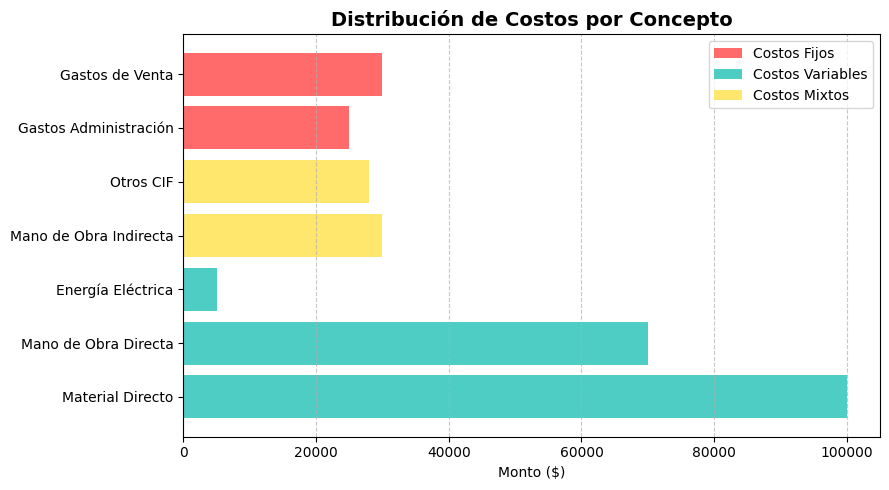

In [77]:
# Preparar datos
costos_detalle = {
    'Concepto': [
        'Material Directo',
        'Mano de Obra Directa',
        'Energía Eléctrica',
        'Mano de Obra Indirecta',
        'Otros CIF',
        'Gastos Administración',
        'Gastos de Venta'
    ],
    'Tipo': ['Variable', 'Variable', 'Variable', 'Mixto', 'Mixto', 'Fijo', 'Fijo'],
    'Monto': [
        datos['material_directo_utilizado'],
        datos['mano_obra_directa'],
        datos['energia_electrica'],
        datos['mano_obra_indirecta_fija'] + datos['mano_obra_indirecta_variable'],
        datos['otros_cif_fijos'] + datos['otros_cif_variables'],
        datos['gastos_administracion'],
        datos['gastos_venta']
    ]
}

df_costos = pd.DataFrame(costos_detalle)

# Gráfico de barras horizontales
plt.figure(figsize=(9, 5))
bars = plt.barh(df_costos['Concepto'], df_costos['Monto'], color=['#ff6b6b' if t == 'Fijo' else '#4ecdc4' if t == 'Variable' else '#ffe66d' for t in df_costos['Tipo']])
plt.xlabel('Monto ($)')
plt.title('Distribución de Costos por Concepto', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#ff6b6b', label='Costos Fijos'),
    Patch(facecolor='#4ecdc4', label='Costos Variables'),
    Patch(facecolor='#ffe66d', label='Costos Mixtos')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

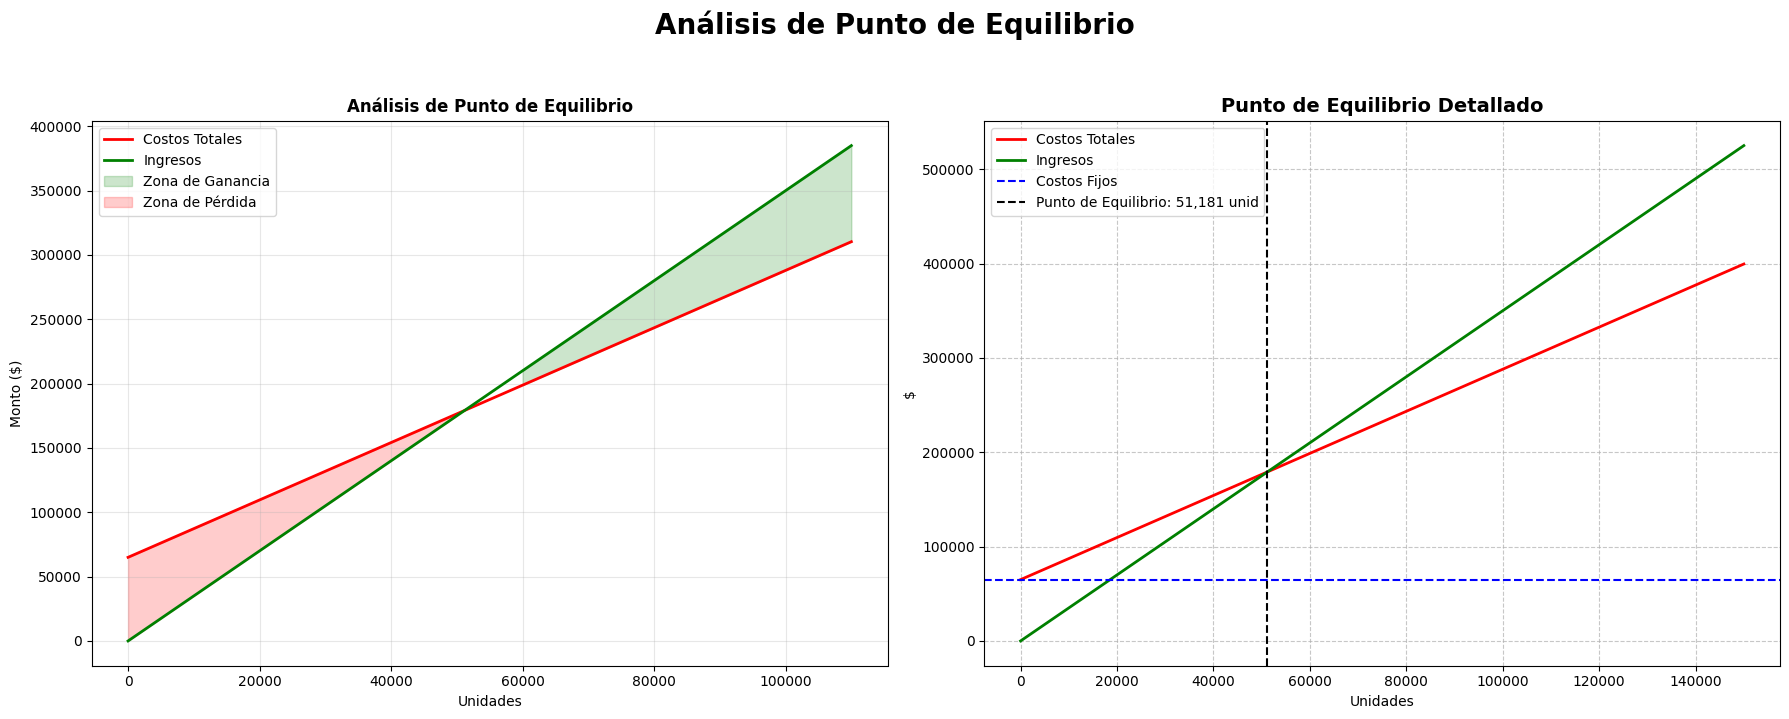

In [78]:
# Datos del análisis
costos_fijos_totales = 20000 + 20000 + 25000  # CIF fijos + Gastos administración
costo_variable_unitario = (100000 + 70000 + 5000 + 10000 + 8000 + 30000) / 100000
precio_venta_unitario = 318500 / 91000  # Aproximado
punto_equilibrio_unidades = costos_fijos_totales / (precio_venta_unitario - costo_variable_unitario)

# Crear la figura y los dos subplots uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- Gráfico de Zonas de Ganancia y Pérdida (en ax1) ---
unidades_range = np.arange(0, 120000, 10000)
costos_totales = costos_fijos_totales + costo_variable_unitario * unidades_range
ingresos = precio_venta_unitario * unidades_range

ax1.plot(unidades_range, costos_totales, label='Costos Totales', linewidth=2, color='red')
ax1.plot(unidades_range, ingresos, label='Ingresos', linewidth=2, color='green')
ax1.fill_between(unidades_range, costos_totales, ingresos, where=(ingresos > costos_totales), 
                 alpha=0.2, color='green', label='Zona de Ganancia')
ax1.fill_between(unidades_range, costos_totales, ingresos, where=(ingresos <= costos_totales), 
                 alpha=0.2, color='red', label='Zona de Pérdida')

ax1.set_title('Análisis de Punto de Equilibrio', fontweight='bold')
ax1.set_xlabel('Unidades')
ax1.set_ylabel('Monto ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Gráfico de Líneas de Referencia (en ax2) ---
unidades_sim = np.linspace(0, 100000 * 1.5, 100) # Usamos 100,000 como referencia de producción
costos_totales_sim = costos_fijos_totales + costo_variable_unitario * unidades_sim
ingresos_sim = precio_venta_unitario * unidades_sim

ax2.plot(unidades_sim, costos_totales_sim, label='Costos Totales', color='red', linewidth=2)
ax2.plot(unidades_sim, ingresos_sim, label='Ingresos', color='green', linewidth=2)
ax2.axhline(y=costos_fijos_totales, color='blue', linestyle='--', label='Costos Fijos')
ax2.axvline(x=punto_equilibrio_unidades, color='black', linestyle='--', label=f'Punto de Equilibrio: {punto_equilibrio_unidades:,.0f} unid')

ax2.set_title('Punto de Equilibrio Detallado', fontsize=14, fontweight='bold')
ax2.set_xlabel('Unidades')
ax2.set_ylabel('$')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Ajustar el diseño general
fig.suptitle('Análisis de Punto de Equilibrio', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

C:\Users\bever\AppData\Local\Temp\ipykernel_11484\3296398084.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(datos_resultados['Concepto'], rotation=45, ha='right')


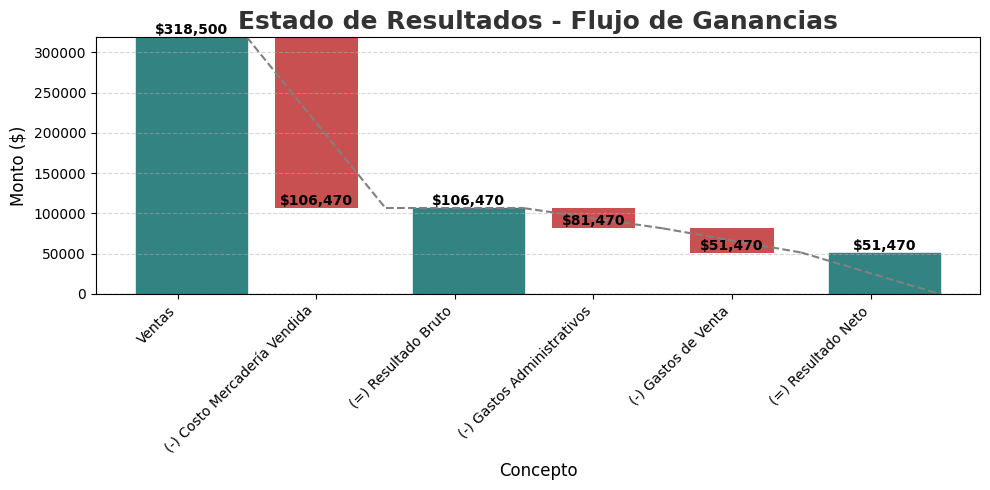

In [79]:
# Definimos explícitamente el flujo de resultados
datos_resultados = pd.DataFrame({
    'Concepto': ['Ventas', '(-) Costo Mercadería Vendida', '(=) Resultado Bruto', '(-) Gastos Administrativos', '(-) Gastos de Venta', '(=) Resultado Neto'],
    'Monto': [318500, -212030, 0, -25000, -30000, 0],
    'Flujo': [1, -1, 1, -1, -1, 1]  # 1 para positivo, -1 para negativo, 0 para totales
})

# Calculamos los totales para trazar el gráfico de cascada
# Se parte de una base de 0
datos_resultados['inicio'] = datos_resultados['Monto'].cumsum().shift(1, fill_value=0)
datos_resultados['fin'] = datos_resultados['Monto'].cumsum()

# Ajustamos la fila para el total final (Resultado Neto)
total_final = datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Neto', 'fin'].iloc[0]
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Neto', 'inicio'] = 0
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Neto', 'Monto'] = total_final

# Ajustamos el monto y la posición del 'Resultado Bruto'
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Bruto', 'Monto'] = datos_resultados['Monto'][0] + datos_resultados['Monto'][1]
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Bruto', 'inicio'] = 0
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Bruto', 'fin'] = datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Bruto', 'Monto']

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Trazamos las barras
barras = ax.bar(
    datos_resultados['Concepto'],
    datos_resultados['Monto'],
    bottom=datos_resultados['inicio'],
    color=[
        '#63b256' if x >= 0 else "#c95050" for x in datos_resultados['Monto']
    ],
    width=0.6
)

# Configuramos las barras de los totales (Ventas, Resultado Bruto, Resultado Neto) con un color diferente
for i, concepto in enumerate(['Ventas', '(=) Resultado Bruto', '(=) Resultado Neto']):
    if concepto in datos_resultados['Concepto'].tolist():
        barras[datos_resultados.index[datos_resultados['Concepto'] == concepto].tolist()[0]].set_color("#328381")
        barras[datos_resultados.index[datos_resultados['Concepto'] == concepto].tolist()[0]].set_width(0.8)

# Añadimos las etiquetas de valor
for barra in barras:
    valor_y = barra.get_height() + barra.get_y()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        valor_y,
        f'${valor_y:,.0f}' if valor_y != 0 else '',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=10
    )

# Conectamos las barras con líneas
y_previo = 0
for i, fila in datos_resultados.iterrows():
    if i > 0:
        ax.plot(
            [i - 0.5, i + 0.5],
            [y_previo, fila['inicio'] + fila['Monto']] if fila['Concepto'] != '(=) Resultado Neto' else [y_previo, fila['inicio']],
            color='gray',
            linestyle='--'
        )
    y_previo = fila['fin']

# Añadimos títulos y etiquetas
ax.set_title('Estado de Resultados - Flujo de Ganancias', fontsize=18, fontweight='bold', color='#333333')
ax.set_ylabel('Monto ($)', fontsize=12)
ax.set_xlabel('Concepto', fontsize=12)

# Ajustamos las etiquetas del eje x
ax.set_xticklabels(datos_resultados['Concepto'], rotation=45, ha='right')

# Añadimos una línea horizontal en 0 como referencia visual
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Ajustamos los márgenes y mostramos el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\bever\AppData\Local\Temp\ipykernel_11484\238706219.py:227: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(datos_resultados['Concepto'], rotation=45, ha='right', color="white")


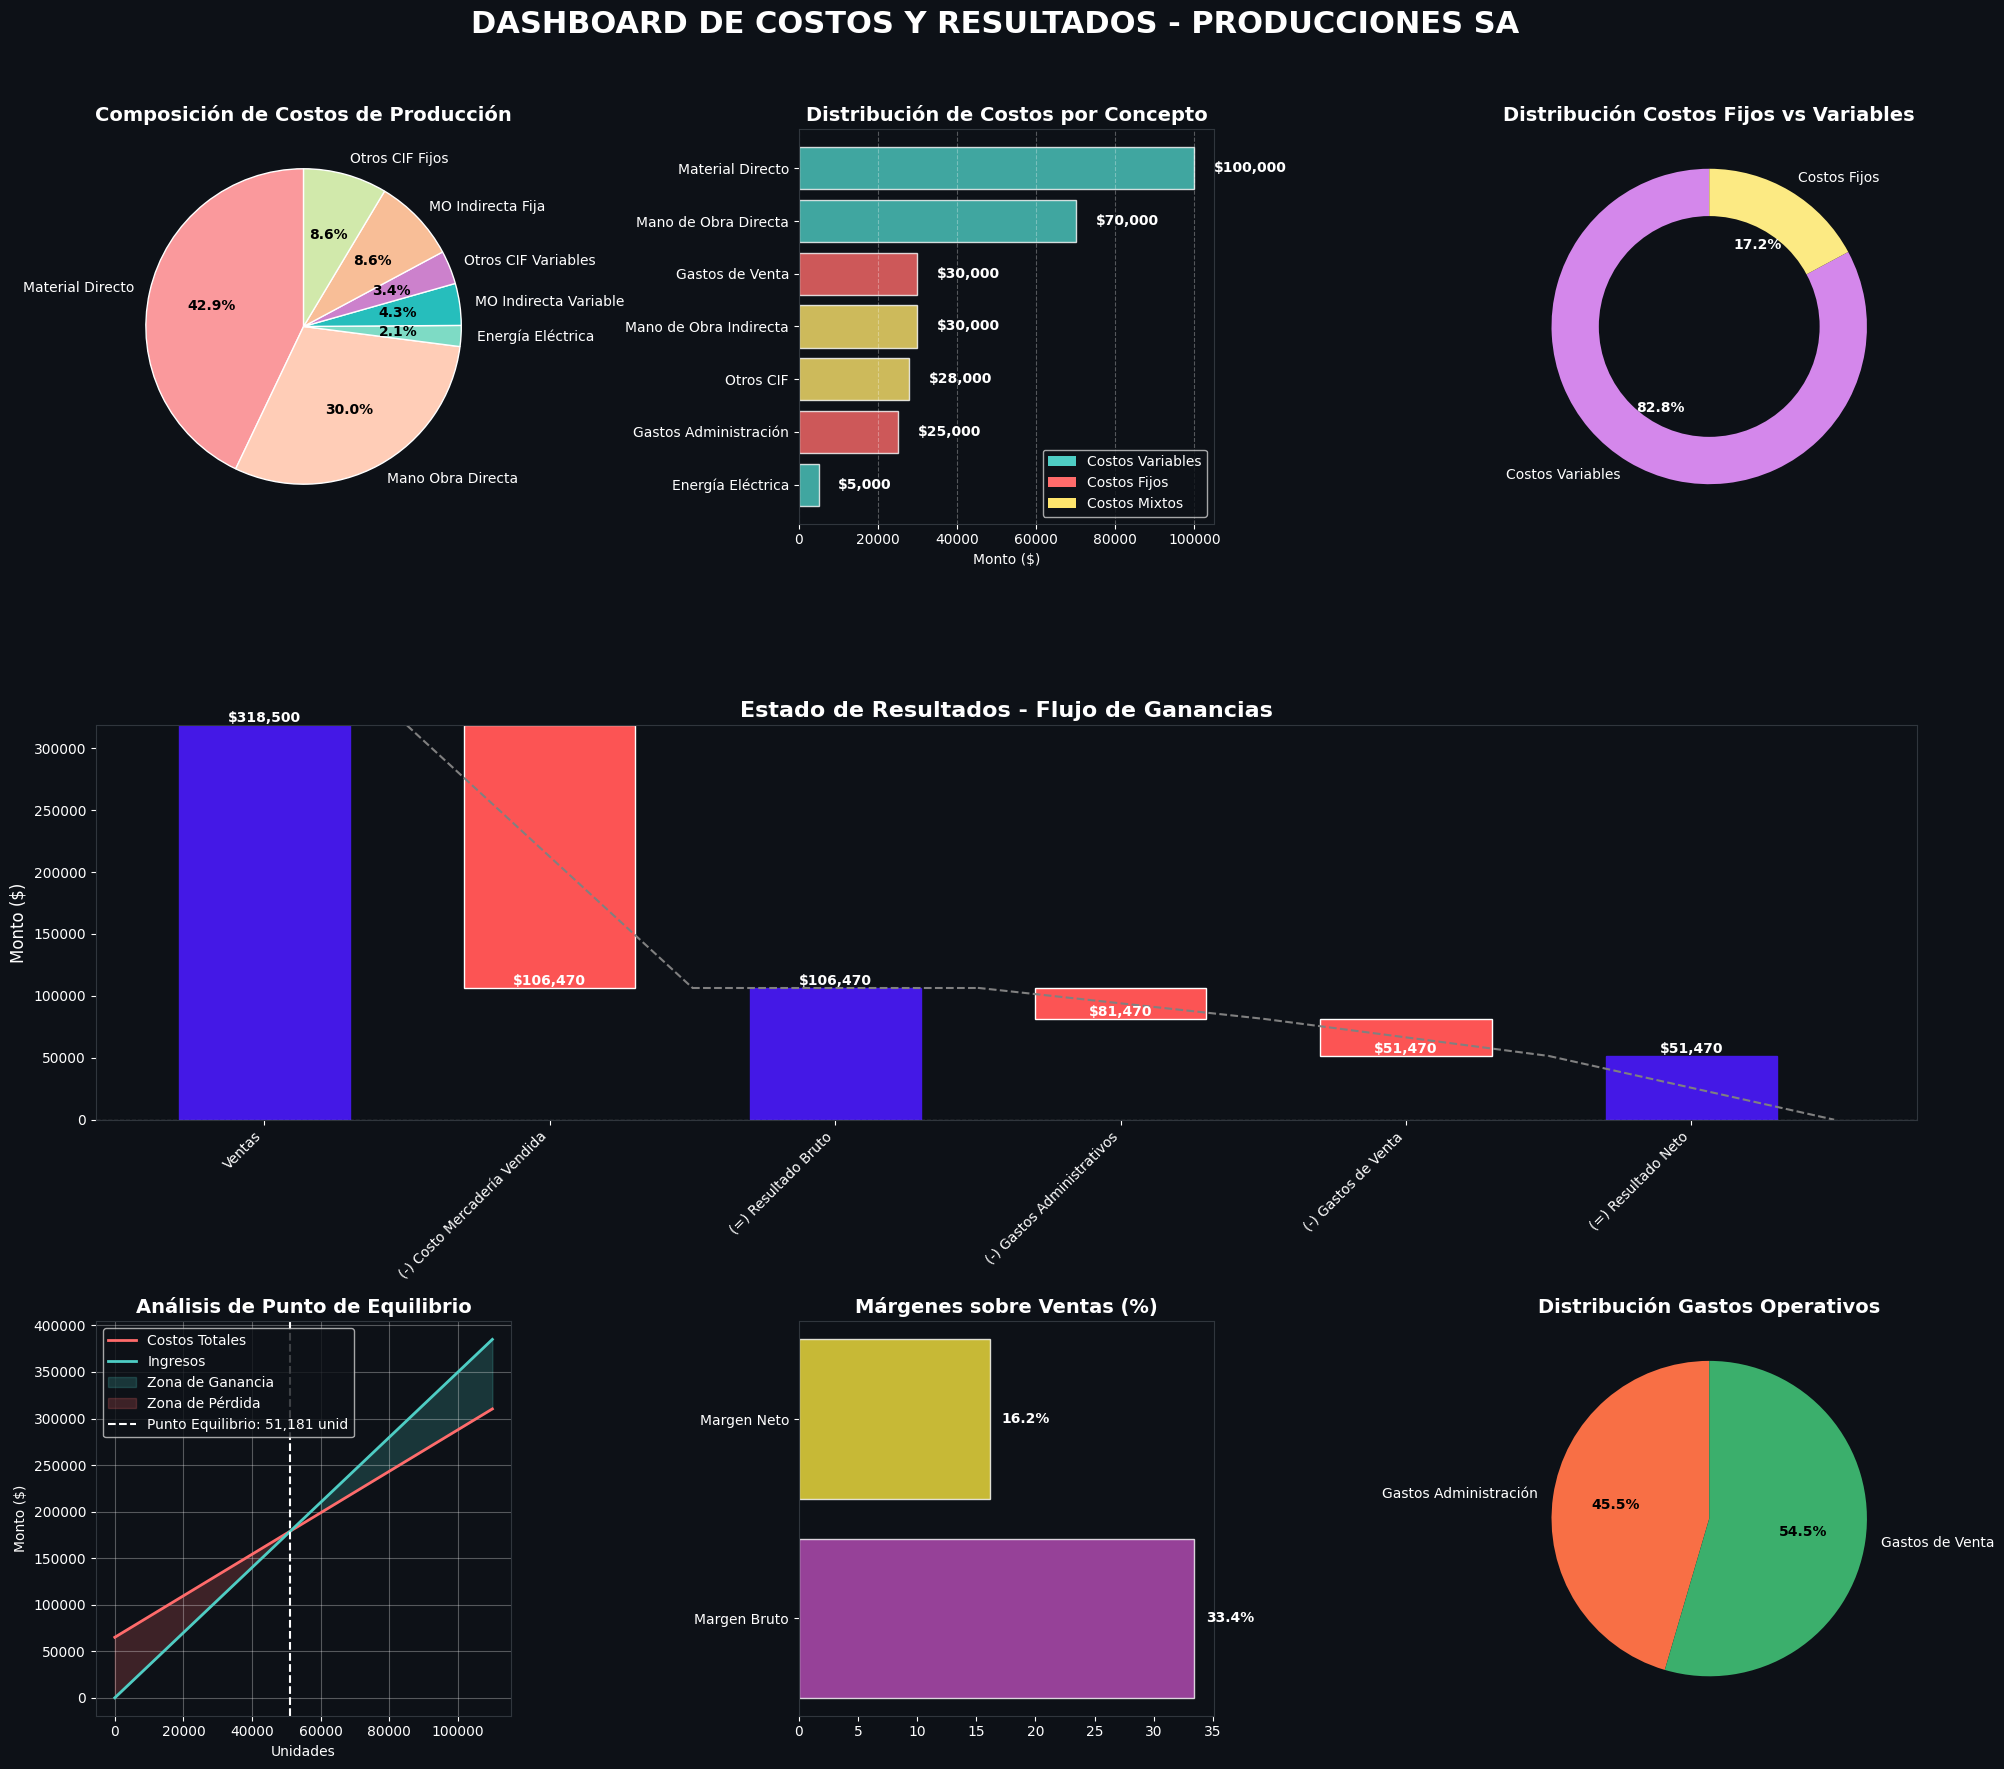

In [ ]:
# CONFIGURACIÓN GLOBAL
plt.style.use("dark_background")
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["axes.facecolor"] = "#0d1117"   # Fondo ejes
plt.rcParams["figure.facecolor"] = "#0d1117" # Fondo figura
plt.rcParams["axes.edgecolor"] = "#30363d"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["ytick.color"] = "white"

# DATOS BASE
datos = {
    'material_directo_utilizado': 100000,
    'mano_obra_directa': 70000,
    'energia_electrica': 5000,
    'mano_obra_indirecta_fija': 20000,
    'mano_obra_indirecta_variable': 10000,
    'otros_cif_fijos': 20000,
    'otros_cif_variables': 8000,
    'gastos_administracion': 25000,
    'gastos_venta': 30000,
    'inventario_final_material_kg': 2000,
    'inventario_final_pt_pesos': 20970,
    'unidades_producidas': 100000,
    'ventas_pesos': 318500,
    'requerimiento_material_por_unidad': 2
}

# Cálculos adicionales
costo_total_produccion = 233000
costo_unitario = 2.33
inventario_final_pt_unidades = 9000

costos_produccion = {
    'Material Directo': datos['material_directo_utilizado'],
    'Mano Obra Directa': datos['mano_obra_directa'],
    'Energía Eléctrica': datos['energia_electrica'],
    'MO Indirecta Variable': datos['mano_obra_indirecta_variable'],
    'Otros CIF Variables': datos['otros_cif_variables'],
    'MO Indirecta Fija': datos['mano_obra_indirecta_fija'],
    'Otros CIF Fijos': datos['otros_cif_fijos']
}

costos_tipo = {
    'Costos Variables': 100000 + 70000 + 5000 + 10000 + 8000,
    'Costos Fijos': 20000 + 20000
}

inventarios = {
    'Material Directo\n(2000 kg)': 1000,
    'Productos Terminados\n(9000 unid)': 20970
}

gastos_operativos = {
    'Gastos Administración': datos['gastos_administracion'],
    'Gastos de Venta': datos['gastos_venta']
}

# Datos para el estado de resultados
resultado_data = {
    'Ventas': 318500,
    'CMV': -212030,
    'Resultado Bruto': 106470,
    'Gastos Adm': -25000,
    'Gastos Venta': -30000,
    'Resultado Neto': 51470
}

# Datos para el análisis de punto de equilibrio
costos_fijos_totales = 20000 + 20000 + 25000  # CIF fijos + Gastos administración
costo_variable_unitario = (100000 + 70000 + 5000 + 10000 + 8000 + 30000) / 100000
precio_venta_unitario = 318500 / 91000  # Aproximado
punto_equilibrio_unidades = costos_fijos_totales / (precio_venta_unitario - costo_variable_unitario)

# Datos para el gráfico de distribución de costos por concepto
costos_detalle = {
    'Concepto': [
        'Material Directo',
        'Mano de Obra Directa',
        'Energía Eléctrica',
        'Mano de Obra Indirecta',
        'Otros CIF',
        'Gastos Administración',
        'Gastos de Venta'
    ],
    'Tipo': ['Variable', 'Variable', 'Variable', 'Mixto', 'Mixto', 'Fijo', 'Fijo'],
    'Monto': [
        datos['material_directo_utilizado'],
        datos['mano_obra_directa'],
        datos['energia_electrica'],
        datos['mano_obra_indirecta_fija'] + datos['mano_obra_indirecta_variable'],
        datos['otros_cif_fijos'] + datos['otros_cif_variables'],
        datos['gastos_administracion'],
        datos['gastos_venta']
    ]
}

df_costos = pd.DataFrame(costos_detalle)

# Paleta de colores mejorada
palette = ["#FA999C", "#FFCDB7", "#7EDBC5", "#26BEBC", "#CC81CC", "#F8BE97", "#D1E9AB", "#6EB95D", "#4D92DB"]


# DASHBOARD MEJORADO

fig = plt.figure(figsize=(20, 18))
fig.suptitle("DASHBOARD DE COSTOS Y RESULTADOS - PRODUCCIONES SA", 
             fontsize=22, fontweight="bold", color="white", y=0.98)

# Definir la estructura del dashboard
gs = fig.add_gridspec(3, 3)

# --- 1. Composición de Costos de Producción ---
ax1 = fig.add_subplot(gs[0, 0])
wedges1, texts1, autotexts1 = ax1.pie(costos_produccion.values(), labels=costos_produccion.keys(),
        autopct='%1.1f%%', startangle=90, colors=palette[:len(costos_produccion)],
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
ax1.set_title("Composición de Costos de Producción", fontweight="bold", color="white", fontsize=14)
for autotext in autotexts1:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# --- 2. Distribución de Costos por Concepto (NUEVO) ---
ax2 = fig.add_subplot(gs[0, 1])
# Ordenar los datos por monto para mejor visualización
df_sorted = df_costos.sort_values('Monto', ascending=True)
colors = ['#4ecdc4' if t == 'Variable' else '#ff6b6b' if t == 'Fijo' else '#ffe66d' for t in df_sorted['Tipo']]
bars = ax2.barh(df_sorted['Concepto'], df_sorted['Monto'], color=colors, edgecolor='white', alpha=0.8)

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    ax2.text(width + 5000, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}', ha='left', va='center', fontweight='bold', color='white')

ax2.set_title('Distribución de Costos por Concepto', fontweight="bold", color="white", fontsize=14)
ax2.set_xlabel('Monto ($)', color="white")
ax2.grid(axis='x', linestyle='--', alpha=0.3)

# Leyenda personalizada
legend_elements = [
    Patch(facecolor='#4ecdc4', label='Costos Variables'),
    Patch(facecolor='#ff6b6b', label='Costos Fijos'),
    Patch(facecolor='#ffe66d', label='Costos Mixtos')
]
ax2.legend(handles=legend_elements, loc='lower right')

# --- 3. Inventarios Finales ---
ax3 = fig.add_subplot(gs[0, 2])
wedges2, texts2, autotexts2 = ax3.pie(costos_tipo.values(), labels=costos_tipo.keys(),
        autopct='%1.1f%%', startangle=90, colors=["#D487EB", "#FCEA83"])
centre_circle = plt.Circle((0,0), 0.70, fc='#0d1117')
ax3.add_artist(centre_circle)
ax3.set_title("Distribución Costos Fijos vs Variables", fontweight="bold", color="white", fontsize=14)
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# --- 4. Estado de Resultados (Waterfall mejorado) ---
ax4 = fig.add_subplot(gs[1, :])
# Datos para el gráfico de cascada
datos_resultados = pd.DataFrame({
    'Concepto': ['Ventas', '(-) Costo Mercadería Vendida', '(=) Resultado Bruto', 
                 '(-) Gastos Administrativos', '(-) Gastos de Venta', '(=) Resultado Neto'],
    'Monto': [318500, -212030, 0, -25000, -30000, 0],
    'Flujo': [1, -1, 1, -1, -1, 1]
})

# Calculamos los totales para trazar el gráfico de cascada
datos_resultados['inicio'] = datos_resultados['Monto'].cumsum().shift(1, fill_value=0)
datos_resultados['fin'] = datos_resultados['Monto'].cumsum()

# Ajustamos la fila para el total final (Resultado Neto)
total_final = datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Neto', 'fin'].iloc[0]
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Neto', 'inicio'] = 0
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Neto', 'Monto'] = total_final

# Ajustamos el monto y la posición del 'Resultado Bruto'
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Bruto', 'Monto'] = datos_resultados['Monto'][0] + datos_resultados['Monto'][1]
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Bruto', 'inicio'] = 0
datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Bruto', 'fin'] = datos_resultados.loc[datos_resultados['Concepto'] == '(=) Resultado Bruto', 'Monto']

# Trazamos las barras
barras = ax4.bar(
    datos_resultados['Concepto'],
    datos_resultados['Monto'],
    bottom=datos_resultados['inicio'],
    color=["#63b256" if x >= 0 else "#fc5454" for x in datos_resultados['Monto']],
    width=0.6,
    edgecolor="white"
)

# Configuramos las barras de los totales (Ventas, Resultado Bruto, Resultado Neto) con un color diferente
for i, concepto in enumerate(['Ventas', '(=) Resultado Bruto', '(=) Resultado Neto']):
    if concepto in datos_resultados['Concepto'].tolist():
        barras[datos_resultados.index[datos_resultados['Concepto'] == concepto].tolist()[0]].set_color("#4418E6")

# Añadimos las etiquetas de valor
for barra in barras:
    valor_y = barra.get_height() + barra.get_y()
    ax4.text(
        barra.get_x() + barra.get_width() / 2,
        valor_y,
        f'${valor_y:,.0f}' if valor_y != 0 else '',
        ha='center',
        va='bottom' if valor_y >= 0 else 'top',
        fontweight='bold',
        fontsize=10,
        color='white'
    )

# Conectamos las barras con líneas
y_previo = 0
for i, fila in datos_resultados.iterrows():
    if i > 0:
        ax4.plot(
            [i - 0.5, i + 0.5],
            [y_previo, fila['inicio'] + fila['Monto']] if fila['Concepto'] != '(=) Resultado Neto' else [y_previo, fila['inicio']],
            color='gray',
            linestyle='--'
        )
    y_previo = fila['fin']

ax4.set_title("Estado de Resultados - Flujo de Ganancias", fontweight="bold", color="white", fontsize=16)
ax4.set_ylabel('Monto ($)', fontsize=12, color="white")
ax4.axhline(0, color='white', linewidth=0.8, linestyle='--')
ax4.set_xticklabels(datos_resultados['Concepto'], rotation=45, ha='right', color="white")

# --- 5. Análisis de Punto de Equilibrio ---
ax5 = fig.add_subplot(gs[2, 0])
unidades_range = np.arange(0, 120000, 10000)
costos_totales = costos_fijos_totales + costo_variable_unitario * unidades_range
ingresos = precio_venta_unitario * unidades_range

ax5.plot(unidades_range, costos_totales, label='Costos Totales', linewidth=2, color='#FF6B6B')
ax5.plot(unidades_range, ingresos, label='Ingresos', linewidth=2, color='#4ECDC4')
ax5.fill_between(unidades_range, costos_totales, ingresos, where=(ingresos > costos_totales), 
                 alpha=0.2, color='#4ECDC4', label='Zona de Ganancia')
ax5.fill_between(unidades_range, costos_totales, ingresos, where=(ingresos <= costos_totales), 
                 alpha=0.2, color='#FF6B6B', label='Zona de Pérdida')

ax5.axvline(x=punto_equilibrio_unidades, color='white', linestyle='--', 
            label=f'Punto Equilibrio: {punto_equilibrio_unidades:,.0f} unid')
ax5.set_title('Análisis de Punto de Equilibrio', fontweight='bold', color="white", fontsize=14)
ax5.set_xlabel('Unidades', color="white")
ax5.set_ylabel('Monto ($)', color="white")
ax5.legend()
ax5.grid(True, alpha=0.3)

# --- 6. Márgenes sobre Ventas ---
ax6 = fig.add_subplot(gs[2, 1])
ventas = resultado_data["Ventas"]
margen_bruto = resultado_data["Resultado Bruto"] / ventas * 100
margen_neto = resultado_data["Resultado Neto"] / ventas * 100
ax6.barh(["Margen Bruto", "Margen Neto"], [margen_bruto, margen_neto], 
         color=["#B94EB9", "#F7E43F"], edgecolor="white", alpha=0.8)
ax6.set_title("Márgenes sobre Ventas (%)", fontweight="bold", color="white", fontsize=14)
for i, v in enumerate([margen_bruto, margen_neto]):
    ax6.text(v + 1, i, f"{v:.1f}%", va="center", fontweight="bold", color="white")

# --- 7. Fijos vs Variables (Donut Chart) ---
ax7 = fig.add_subplot(gs[2, 2])
wedges7, texts7, autotexts7 = ax7.pie(gastos_operativos.values(), labels=gastos_operativos.keys(),
        autopct='%1.1f%%', startangle=90, colors=["#F86F45", "#3BAF6C"])
ax7.set_title("Distribución Gastos Operativos", fontweight="bold", color="white", fontsize=14)
for autotext in autotexts7:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])


# GUARDAR COMO IMAGEN

plt.savefig("dashboard_costos_completo.png", dpi=300, bbox_inches="tight", facecolor="#0d1117")
plt.show()